In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 10

import cPickle as pickle
from sklearn.preprocessing import StandardScaler


from code.featurize import sim_by_node

In [4]:
df = pickle.load(open('features.pkl', 'rb'))
df.index.name = 'node'
df.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,,,
0,37.750067,-122.441075,718895.248337,-0.000153,-0.014650,0.158808,123.369982,-0.035714,1.806452,112,80.172298
1,37.750196,-122.438933,834313.797096,-0.002185,0.169033,-0.076971,105.325899,0.039474,2.375000,152,83.318625
2,37.756794,-122.436270,900225.127625,-0.012031,0.008118,0.125270,143.830470,-0.284672,1.902778,137,93.471872
3,37.753529,-122.437050,820289.998581,0.218998,0.471783,0.216543,110.432877,-0.019108,2.308824,157,91.519785
4,37.755758,-122.433400,776981.611641,-0.008045,-0.010146,0.052978,137.947900,-0.065789,2.140845,152,92.032526


In [11]:
ssc = StandardScaler()
fsc = ssc.fit_transform(df.iloc[:,2:])
fsc = pd.DataFrame(fsc)
fsc.columns = df.columns[2:]
fsc.index = df.index

print fsc.shape
fsc.head()

(7334, 9)


,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,
0,-0.143650,-0.350460,-0.445878,-0.435097,-0.312602,0.605849,0.103163,0.018275,-0.025533
1,-0.129873,-0.353792,-0.357719,-0.499936,-0.334623,0.761286,0.531302,0.302212,0.146457
2,-0.122005,-0.369935,-0.434951,-0.444320,-0.287633,0.091179,0.175701,0.195736,0.701471
3,-0.131547,0.008849,-0.212415,-0.419220,-0.328391,0.640179,0.481469,0.337704,0.594762
4,-0.136716,-0.363400,-0.443716,-0.464200,-0.294812,0.543675,0.354975,0.302212,0.622791


In [5]:
edges = pickle.load(open('edges.pkl'))
edges.head()

,node1,node2,dist
0,0,1086,0.001064
1,0,4952,0.001074
2,0,4067,0.001337
3,0,2729,0.001620
4,1,4952,0.001072


In [12]:
edges['sim'] = edges.apply(lambda x: sim_by_node(int(x.node1), int(x.node2), fsc), axis = 1)
edges.head()

,node1,node2,dist,sim
0,0,1086,0.001064,2.098700
1,0,4952,0.001074,1.767092
2,0,4067,0.001337,2.478210
3,0,2729,0.001620,1.348632
4,1,4952,0.001072,3.672129


In [34]:
edges.sort_values('sim').head()

,node1,node2,dist,sim
24058,6086,610,0.001768,0.036353
17060,4311,6087,0.004431,0.041095
1009,255,6086,0.001127,0.043231
24055,6086,255,0.001127,0.043231
12383,3122,1829,0.003996,0.043883


In [22]:
latlon = df[['lat', 'lon']]

CPU times: user 26.1 s, sys: 1.23 s, total: 27.3 s
Wall time: 30.9 s


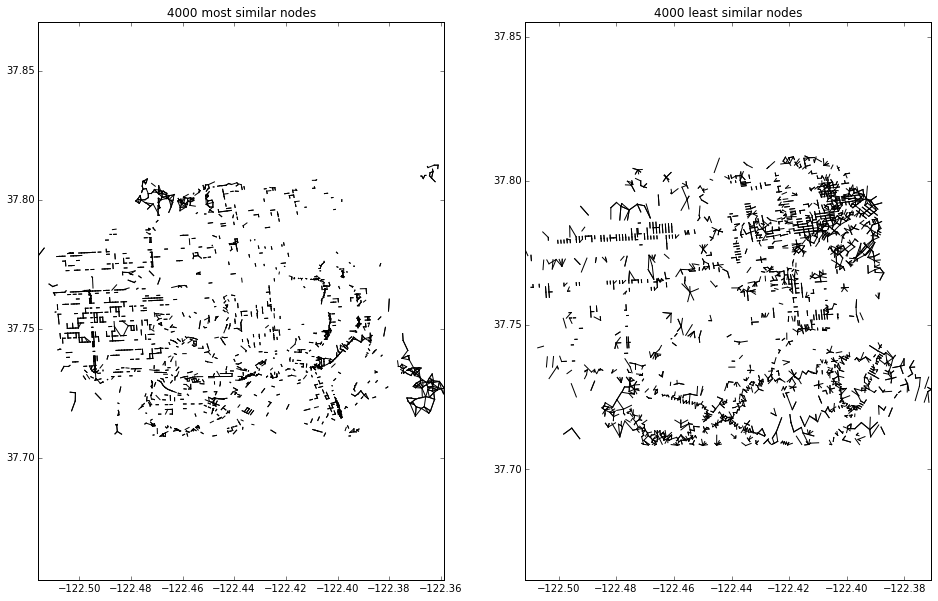

In [37]:
%%time
nleast = 4000
nmost = 4000


plt.subplot(1,2,1)
for idx in edges.sort_values('sim').index[-1*nmost:]:
    node1 = int(edges.ix[idx].node1)
    node2 = int(edges.ix[idx].node2)

    plt.plot([latlon.ix[node1].lon, latlon.ix[node2].lon], [latlon.ix[node1].lat, latlon.ix[node2].lat], c='black')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)
plt.title('%d most similar nodes' % nmost)

plt.subplot(1,2,2)
for idx in edges.sort_values('sim').index[:nleast]:
    node1 = int(edges.ix[idx].node1)
    node2 = int(edges.ix[idx].node2)

    plt.plot([latlon.ix[node1].lon, latlon.ix[node2].lon], [latlon.ix[node1].lat, latlon.ix[node2].lat], c='black')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)
plt.title('%d least similar nodes' % nleast)

In [39]:
sim = edges.groupby('node1').mean()['sim']
sim.head()

node1
0    1.923158
1    2.314381
2    2.405491
3    1.640719
4    2.909995
Name: sim, dtype: float64

In [45]:
sim.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333],
           dtype='int64', name=u'node1', length=7325)

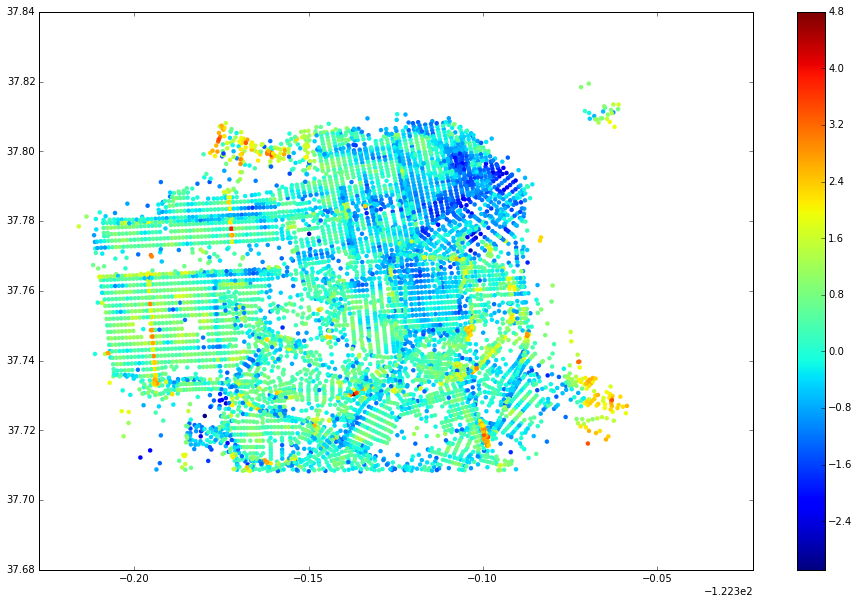

In [56]:
plt.scatter(df.ix[sim.index].lon, df.ix[sim.index].lat, c=np.log(sim.values),
            linewidths=0)
plt.colorbar()
# plt.clim(0,5)
plt.axis('equal');

Log of similarity plot. Color of each node reflects mean of similarity to connected nodes.